### Python based viewer tool for "Probabilistic Reasoning over time", EDAP01 Artificial Intelligence
This notebook has been provided to you by Alexander Dürr, teaching assistant on the course, spring term 2021. It is based on the ideas and structure of the original Java skeleton for this assignment, provided by Elin A. Topp. Contact us (elin_anna.topp at cs.lth.se) in case you need help!

### Note: Installing and activating widgets for Jupyter Notebook
To be able to display the visualization (dashboard,animations,etc.) you have to initially install the package  if you don't have it yet

### Note: Use Jupyter Lab for programming, Jupyter Notebook for visualization (optional)
This command only enables the extension for jupyter notebook and not in jupyter lab! You can edit from the comfort of jupyter lab though and when you feel like using the widgets just go to

Menu bar > Help > Launch Classic Notebook

## Here we go... inspecting the models, option 1

### Your main job will be in the file Filters.py and in the last cell of this notebook, this is only to understand the models

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that the visualization (next cell on inspecting the models, option 2) assumes to have access to an object of type _Localizer_ which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter(sensorR)_. This means that IF you want to make use of the visualisation in grid-view (below!) also for the actual tracking, you MUST implement the filtering in _Filters.HMM_Filter.filter(sensorR)_ (or make changes in _Localizer.Localizer.update()_)



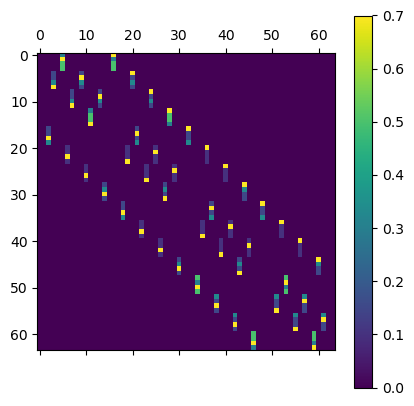

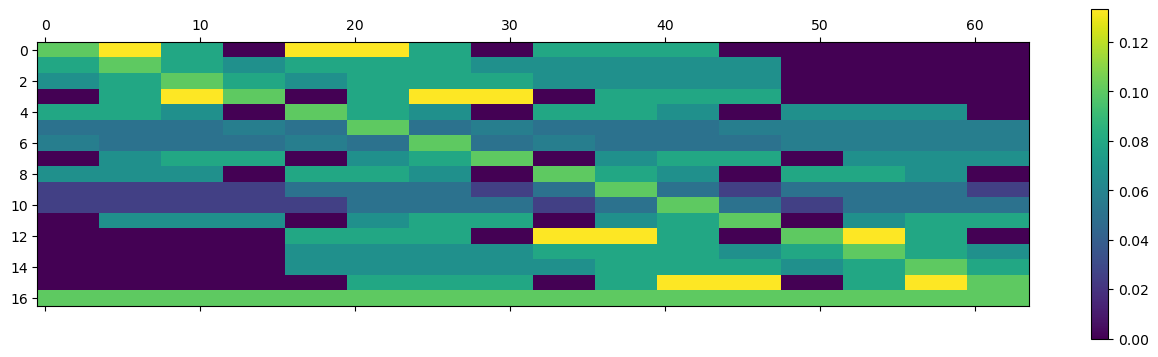

[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.1 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.1 0.  0. ]
 [0.  0.  0.  ... 0.  0.1 0. ]
 [0.  0.  0.  ... 0.  0.  0.1]]
(True, 1, 1, 0, 1, 0, 1, 0, 1, array([0.05683837, 0.05683837, 0.05683837, 0.05683837, 0.09236234,
       0.09236234, 0.09236234, 0.09236234, 0.07696862, 0.07696862,
       0.07696862, 0.07696862, 0.        , 0.        , 0.        ,
       0.        , 0.11545293, 0.11545293, 0.11545293, 0.11545293,
       0.09946714, 0.09946714, 0.09946714, 0.09946714, 0.08288928,
       0.08288928, 0.08288928, 0.08288928, 0.        , 0.        ,
       0.        , 0.        , 0.09236234, 0.09236234, 0.09236234,
       0.09236234, 0.09946714, 0.09946714, 0.09946714, 0.09946714,
       0.08288928, 0.08288928, 0.08288928, 0.0828

In [1]:
from models import *
from view_control.Localizer import Localizer

# Testing the models, e.g., for an 4x8 grid

states = StateModel( 4, 4)
loc = Localizer( states, 1)
tMat = loc.get_transition_model()
sVecs = loc.get_observation_model()
tMat.plot_T()
sVecs.plot_o_diags()
print(sVecs.get_o_reading(0))
print(sVecs.get_o_reading(None))

print(loc.update())


## Here we go again... inspecting the models, option 2

### Your implementation job will still be in the file Filters.py, this is only to understand the models AND to get a glimpse of a tracking run (but it is slow)

In _models_, all the actually interesting stuff is located, and in _Filters_ you should write your own code. Note that this visualization assumes to have access to an object of type Localizer which in turn expects the filtering / smoothing to happen in _Filters.HMM_Filters.filter()_. This means that IF you want to make use of the visualisation in grid-view also for the actual tracking, you MUST implement the filtering in Filters.HMM_Filter.filter() (or make respective changes in _Localizer.Localizer.update()_)

### Your Task 1)
#### Inspect the visualisation of the models by running the cell and experimenting with the GUI, in particular compare and explain the different versions of the sensor model (see more detailed instructions for the task and report)

In [2]:
# In view_control.Dashboard, there is simply the handling of all the thread based visualisation provided, 
# no changes needed, but feel free...

from view_control import *

ROWS = 4
COLS = 4

# The dashboard creates a state model of the dimensions given by ROWS and COLS, sets up the respective 
# Transition and Observation models, as well as an instance of class Localizer. The Localizer calls at the 
# moment a stubb method toDo.Filters.HMMFilter.filter(sensorReading), which just sends back the original 
# probability distribution - no filtering is done. It is your task to implement something useful there.

# Non-uniform failure is the default sensor, sensor 0. Change to 1 if that is your default 
# (uniform sensor failure)
sensorType = 0
dash = Dashboard(ROWS, COLS, sensorType)
display(dash.db)


12 12 [ 0  3  6  9 12]
12 12 [ 0  3  6  9 12]
true pose = <1, 3, 1>, sensed nothing
nbr of moves: 1, avg error: 1.0, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]
true pose = <0, 3, 2>, sensed nothing
nbr of moves: 2, avg error: 1.5, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]
true pose = <1, 3, 0>, sensed nothing
nbr of moves: 3, avg error: 1.6666666666666667, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]
true pose = <1, 2, 3>, sensed nothing
nbr of moves: 4, avg error: 1.75, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]
true pose = <1, 1, 3>, sensed position = <2, 2>, guessed position = <2, 2>
nbr of moves: 5, avg error: 1.8, nbr correct guesses: 0
12 12 [ 0  3  6  9 12]
true pose = <0, 1, 2>, sensed position = <0, 1>, guessed position = <0, 1>
nbr of moves: 6, avg error: 1.5, nbr correct guesses: 1
12 12 [ 0  3  6  9 12]
true pose = <0, 2, 1>, sensed nothing
nbr of moves: 7, avg error: 1.2857142857142858, nbr correct guesses: 2
12 12 [ 0  3  6  9 12]
true pose = <0, 3, 1>, sensed 

## Write your own "main" here (without the viewer)

### Your task 2)
#### Implement both Forward Filtering and Forward-Backward Smoothing with k = t-5 (a sequence length of 5)
#### Do evaluations (500 steps should be enough also for the bigger grids) according to the following, adapt the number of steps or the size of the grid if needed, but comment on it
#### Provide plots of the Manhattan distance over time

1)
* Forward Filtering with non-uniform sensor failure on 8x8 grid against
* Sensor output only (non-uniform sensor failure, count sensor failures to get the average frequency, but do not count those steps into the avg Manhattan distance) on 8x8 grid 


2)
* Forward Filtering with non-uniform sensor failure on 4x4 grid against
* Forward Filtering with uniform sensor failure on 4x4 grid


3)
* Forward Filtering with non-uniform sensor failure on 16x20 grid against
* Forward Filtering with uniform sensor failure on 16x20 grid


4)
* Forward Filtering with non-uniform sensor failure on 10x10 grid against
* Smoothing (forward-backward smoothing) with k = t-5 (five steps for b) and non-uniform sensor failure on 10x10 grid

#### OBS: obviously, each pair-wise evaluation should be run based on the same true trajectory (cases 1, 2, 3) or same trajectory AND same sensor reading sequence (for case 4).

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

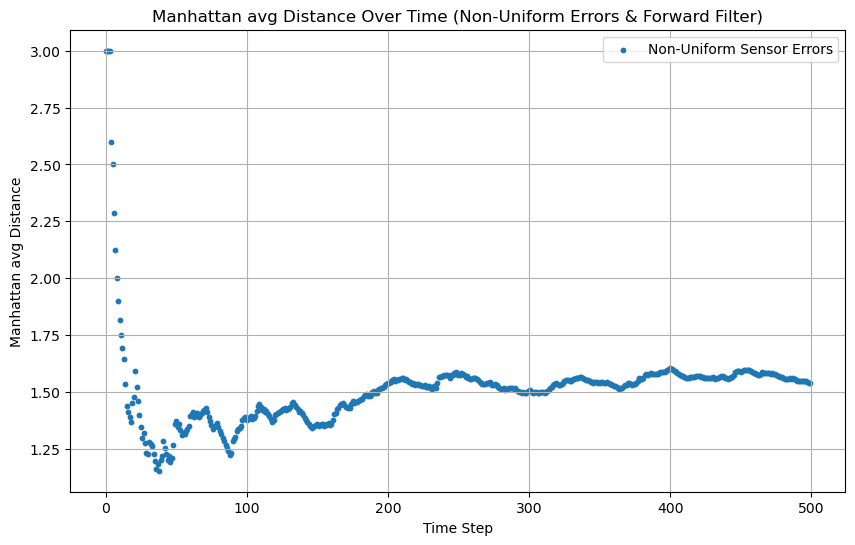

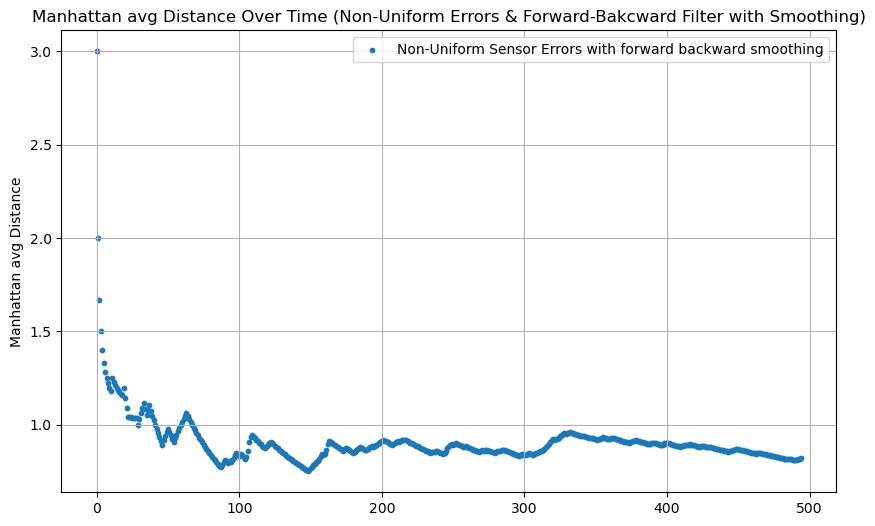

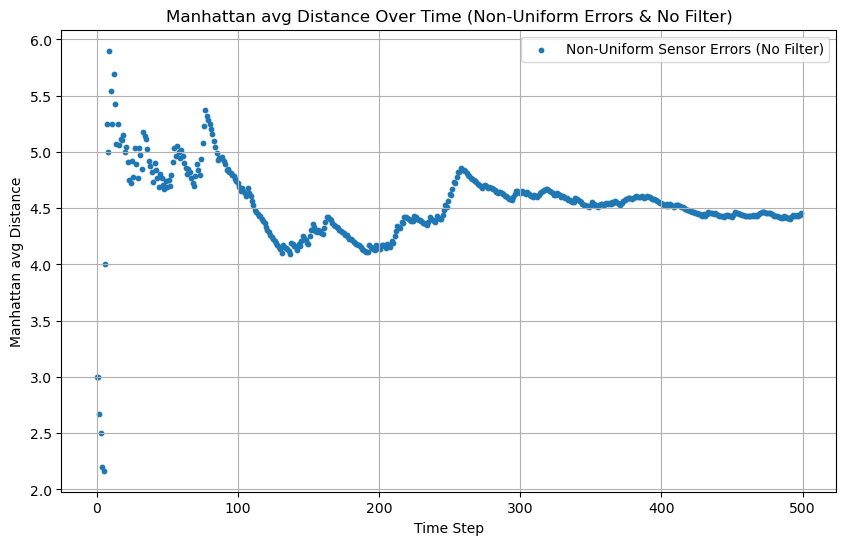

Total Sensor Failures for Non Uniform Sensor: 144
Mean Manhattan distance for Non Uniform Sensor: 1.538
Mean Manhattan distance for Non Uniform Sensor (No filter): 4.454
Accuracy for Non Uniform Sensor: 0.368
Mean Manhattan distance for Non Uniform Sensor with forward backward smoothing: 0.8202020202020202
Accuracy for Non Uniform Sensor with forward backward smoothing: 0.6080808080808081
301


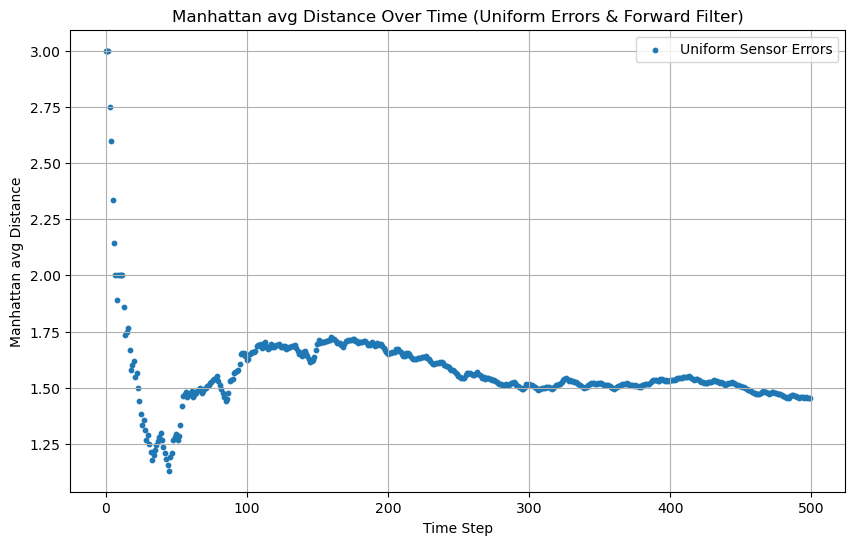

Total Sensor Failures for Uniform Sensor: 59
Mean Manhattan distance for Uniform Sensor: 1.452
Accuracy for Unifrom Sensor: 0.394


In [3]:
# In this cell, you can write your own "main" to run and evaluate your 
# implementation without using the visualisation above (should be considerably faster!)

from models import *
from Filters import HMMFilter_nuf, HMMFilter_uf, HMMFilter_fix_lagged_smoothing

import numpy as np
import matplotlib.pyplot as plt
import random



class Local_localizer:
    def __init__(self, sm):
        
        self.__sm = sm
        self.__tm = TransitionModel(self.__sm)
        self.__om_uf = ObservationModel_UF.ObservationModelUF(self.__sm)
        self.__om_nuf = ObservationModel_NUF.ObservationModel(self.__sm)

        
        self.initialise()
        
    
    def initialise(self):
        self.__trueState = random.randint(0, self.__sm.get_num_of_states() - 1)
        self.__sense_nuf = None
        self.__sense_uf = None
        self.__probs = np.ones(self.__sm.get_num_of_states()) / (self.__sm.get_num_of_states())
        self.__estimate = self.__sm.state_to_position(np.argmax(self.__probs))

        
        
        self.__rs = RobotSim( self.__trueState, self.__sm)
        self.__HMM_nuf = HMMFilter_nuf( self.__probs, self.__tm, self.__om_nuf, self.__sm)
        self.__HMM_uf = HMMFilter_uf( self.__probs, self.__tm, self.__om_uf, self.__sm)
        self.__HMM_fb = HMMFilter_fix_lagged_smoothing( self.__probs, self.__tm, self.__om_nuf, self.__sm)
        
        
    def update(self) -> (bool,bool, int, int, int, int, int, int, int, int, int, int, int, int, int, int, int, int, int, int,np.array(1), np.array(1), np.array(1)) :
        self.__trueState = self.__rs.move_once(self.__tm)
        self.__sense_nuf = self.__rs.sense_in_current_state(self.__om_nuf)
        self.__sense_uf = self.__rs.sense_in_current_state(self.__om_uf)
        self.__probs_nuf = self.__HMM_nuf.filter_nuf(self.__sense_nuf)
        self.__probs_uf = self.__HMM_uf.filter_uf(self.__sense_uf)
        self.__probs_fb = self.__HMM_fb.filter_and_smooth_nuf(self.__sense_nuf)
        
        fPositions_nuf = self.__probs_nuf.copy()
        fPositions_uf = self.__probs_uf.copy()
        fPositions_fb = self.__probs_fb.copy()
        
        for state in range(0, self.__sm.get_num_of_states(), 4) :
            fPositions_nuf[state:state+4] = sum(fPositions_nuf[state:state+4])
            
        for state in range(0, self.__sm.get_num_of_states(), 4) :
            fPositions_uf[state:state+4] = sum(fPositions_uf[state:state+4])
            
        for state in range(0, self.__sm.get_num_of_states(), 4) :
            fPositions_fb[state:state+4] = sum(fPositions_fb[state:state+4])
            
        self.__estimate_nuf = self.__sm.state_to_position(np.argmax(fPositions_nuf))
        self.__estimate_uf = self.__sm.state_to_position(np.argmax(fPositions_uf))
        self.__estimate_fb = self.__sm.state_to_position(np.argmax(fPositions_fb))
        
        ret_uf = False 
        ret_nuf = False 
        tsX, tsY, tsH = self.__sm.state_to_pose(self.__trueState)
        srX_uf = -1
        srY_uf = -1
        srY_nuf = -1
        srX_nuf = -1
        
        
        if self.__sense_uf != None:
            srX_uf, srY_uf = self.__sm.reading_to_position(self.__sense_uf)
            ret_uf = True
            
        if self.__sense_nuf != None:
            srX_nuf, srY_nuf = self.__sm.reading_to_position(self.__sense_nuf)
            ret_nuf = True
            
            
        eX_nuf, eY_nuf = self.__estimate_nuf
        eX_uf, eY_uf = self.__estimate_uf
        eX_fb, eY_fb = self.__estimate_fb
       
        error_uf = abs(tsX-eX_uf)+abs(tsY-eY_uf)
        error_nuf = abs(tsX-eX_nuf)+abs(tsY-eY_nuf)
        error_fb = abs(tsX-eX_fb) + abs(tsX-eX_fb)
                       
        
        return ret_uf,ret_nuf, tsX, tsY, tsH, srX_uf, srY_uf, srX_nuf, srY_nuf, eX_uf, eY_uf, eX_nuf, eX_nuf, eX_fb, eY_fb, error_uf, error_nuf, error_fb, fPositions_uf, fPositions_nuf, fPositions_fb


#states = StateModel(8,8) #task 1
#states = StateModel(4,4) #task 2
#states = StateModel(16,20) #task 3
states = StateModel(10,10) # task 4
local_loc = Local_localizer(states)
manhattan_nuf = []
manhattan_uf = []
manhattan_fb = []
correct_fb = 0
correct_uf = 0
correct_nuf = 0
manhattan_nuf_avg = []
manhattan_uf_avg = []
manhattan_fb_avg=[]
manhattan_sensor = []
manhattan_sensor_avg = []
true_states = [] 
sensor_failures_nuf = 0
sensor_failures_uf = 0

for i in range(500):
    ret_uf,ret_nuf, tsX, tsY, tsH, srX_uf, srY_uf, srX_nuf, srY_nuf, eX_uf, eY_uf, eX_nuf, eX_nuf, eX_fb, eY_fb, error_uf, error_nuf, error_fb_, fPositions_uf, fPositions_nuf, fPositions_fb = local_loc.update()
    
    
    if ret_nuf != True:
        sensor_failures_nuf = sensor_failures_nuf +1
    if ret_uf != True:
        sensor_failures_uf = sensor_failures_uf+1 
        
    true_states.append((tsX,tsY))
        
    
    if len(true_states) == 6:  
        true_state_5_back = true_states[0]
        
        error_fb = abs(true_state_5_back[0] - eX_fb) + abs(true_state_5_back[1] - eY_fb)
        manhattan_fb.append(error_fb)
        manhattan_fb_avg.append(sum(manhattan_fb) / len(manhattan_fb))
        true_states.pop(0)

        if error_fb == 0:
            correct_fb += 1
    
    
    manhattan_uf.append(error_uf)
    manhattan_uf_avg.append(sum(manhattan_uf)/len(manhattan_uf))
    if error_uf == 0:
        correct_uf = correct_uf +1
    
    
    ''' 
    if ret_nuf == True: # for task 1 I d not include the the none readings in the plots 
        manhattan_nuf.append(error_nuf)
        manhattan_nuf_avg.append(sum(manhattan_nuf)/len(manhattan_nuf))
        error_sens = abs(tsX-srX_nuf) + abs(tsY-srY_nuf)
        manhattan_sensor.append(error_sens)
        manhattan_sensor_avg.append(sum(manhattan_sensor)/len(manhattan_sensor))
        if error_nuf == 0:
            correct_nuf = correct_nuf +1
     '''   
    manhattan_nuf.append(error_nuf)
    manhattan_nuf_avg.append(sum(manhattan_nuf)/len(manhattan_nuf))
    error_sens = abs(tsX-srX_nuf) + abs(tsY-srY_nuf)
    manhattan_sensor.append(error_sens)
    manhattan_sensor_avg.append(sum(manhattan_sensor)/len(manhattan_sensor))
    if error_nuf == 0:
        correct_nuf = correct_nuf +1

time_steps_fb = list(range(len(manhattan_fb)))
time_steps_nuf = list(range(len(manhattan_nuf)))
time_steps_uf = list(range(len(manhattan_uf)))



plt.figure(figsize=(10, 6))
plt.scatter(time_steps_nuf, manhattan_nuf_avg, label='Non-Uniform Sensor Errors', s=10) 
plt.xlabel('Time Step')
plt.ylabel('Manhattan avg Distance')
plt.title('Manhattan avg Distance Over Time (Non-Uniform Errors & Forward Filter)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(time_steps_fb, manhattan_fb_avg, label='Non-Uniform Sensor Errors with forward backward smoothing', s=10)  
plt.ylabel('Manhattan avg Distance')
plt.title('Manhattan avg Distance Over Time (Non-Uniform Errors & Forward-Bakcward Filter with Smoothing)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(time_steps_nuf, manhattan_sensor_avg, label='Non-Uniform Sensor Errors (No Filter)', s=10) 
plt.xlabel('Time Step')
plt.ylabel('Manhattan avg Distance')
plt.title('Manhattan avg Distance Over Time (Non-Uniform Errors & No Filter)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Total Sensor Failures for Non Uniform Sensor: {sensor_failures_nuf}")
print(f"Mean Manhattan distance for Non Uniform Sensor: {np.mean(manhattan_nuf)}")
print(f"Mean Manhattan distance for Non Uniform Sensor (No filter): {np.mean(manhattan_sensor)}")
print(f"Accuracy for Non Uniform Sensor: {correct_nuf/len(manhattan_nuf)}")
print(f"Mean Manhattan distance for Non Uniform Sensor with forward backward smoothing: {np.mean(manhattan_fb)}")
print(f"Accuracy for Non Uniform Sensor with forward backward smoothing: {correct_fb/len(manhattan_fb)}")
print(correct_fb)


plt.figure(figsize=(10, 6))
plt.scatter(time_steps_uf, manhattan_uf_avg, label='Uniform Sensor Errors', s=10)  # s is the size of the point
plt.xlabel('Time Step')
plt.ylabel('Manhattan avg Distance')
plt.title('Manhattan avg Distance Over Time (Uniform Errors & Forward Filter)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Total Sensor Failures for Uniform Sensor: {sensor_failures_uf}")
print(f"Mean Manhattan distance for Uniform Sensor: {np.mean(manhattan_uf)}")
print(f"Accuracy for Unifrom Sensor: {correct_uf/len(manhattan_uf)}")




